<a href="https://colab.research.google.com/github/ROrodrigp/ProgramacionCienciaDatos/blob/main/Kmedias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


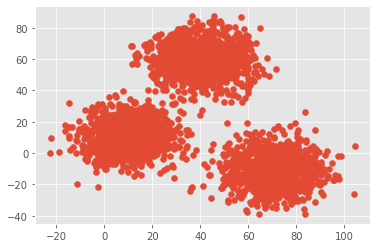

In [5]:
x1 = data.V1.values
x2 = data.V2.values 
#Revisamos de forma gráfica nuestros datos 
x = np.array(list(zip(x1,x2)))
plt.scatter(x1,x2)

In [6]:
from sklearn.cluster import KMeans

In [12]:
km = KMeans(n_clusters=3)
km = km.fit(x) #Le estamos diciendo que se entrene con los datos x que definimos arriba 
y_hat = km.predict(x)
c = km.cluster_centers_ #Calcula la media a los datos 

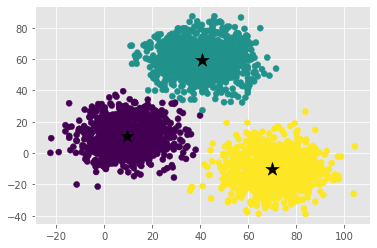

In [13]:
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y_hat) #Todas las componentes v1 
ax.scatter(c[:,0],c[:,1], marker='*', s=200, c='k') #centroides de cada uno de los grupos  

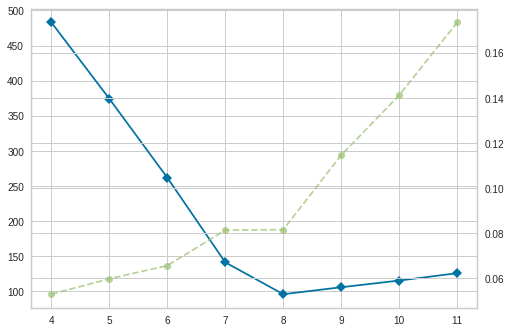

In [17]:
#¿Cómo elegir un valor para k? => Gráfica de codo
#k es el número de grupos . No tenemos una buena forma de elegirlos 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

x,y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
vis = KElbowVisualizer(KMeans(), k=(4,12)) #Se propone que k vaya de 4 a 12 
vis.fit(x)
plt.show()

#Eje x número de grupos
#Eje y tiempo que se tarda en ejecutar 
#


La recomendación es elegir donde el codo se dobla. En el caso de la línea azul sería entre 7 y 8. Esta es una guía para la primera elección del grupo. La línea azul significa cuánto esta tardando en ejecutarse. El valor óptimo para k sería 8 en este caso.   

En los hiperparámetros no hay forma fácil de encontrarlos. Lo que se hace es iterar sobre ellos. 

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (12,9)


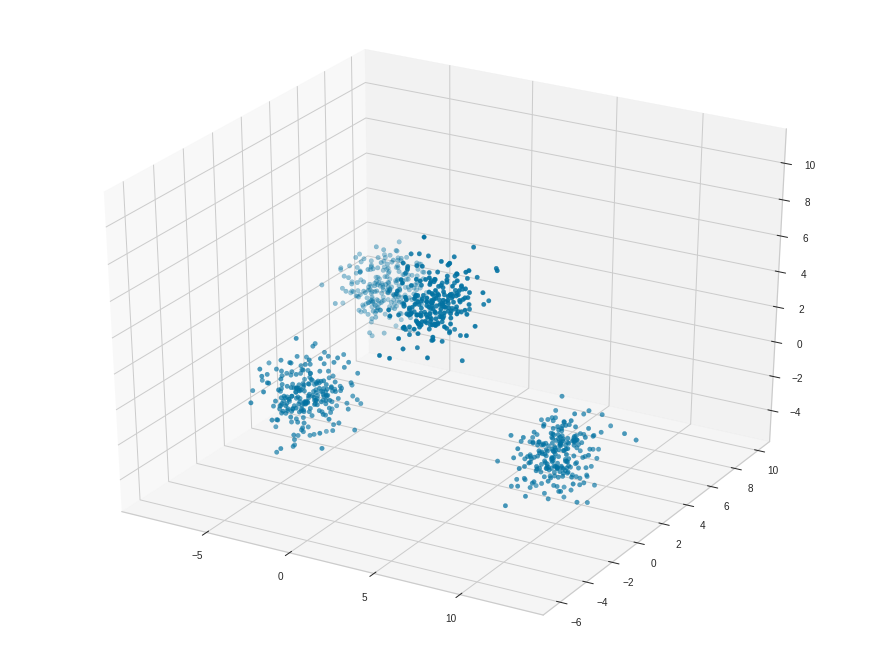

In [25]:
x,y = make_blobs(n_samples=900, n_features=3, centers=4)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0],x[:,1],x[:,2])

In [26]:
#Aplicamos k medias 
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(x)
y_hat = kmeans.predict(x)
c = kmeans.cluster_centers_


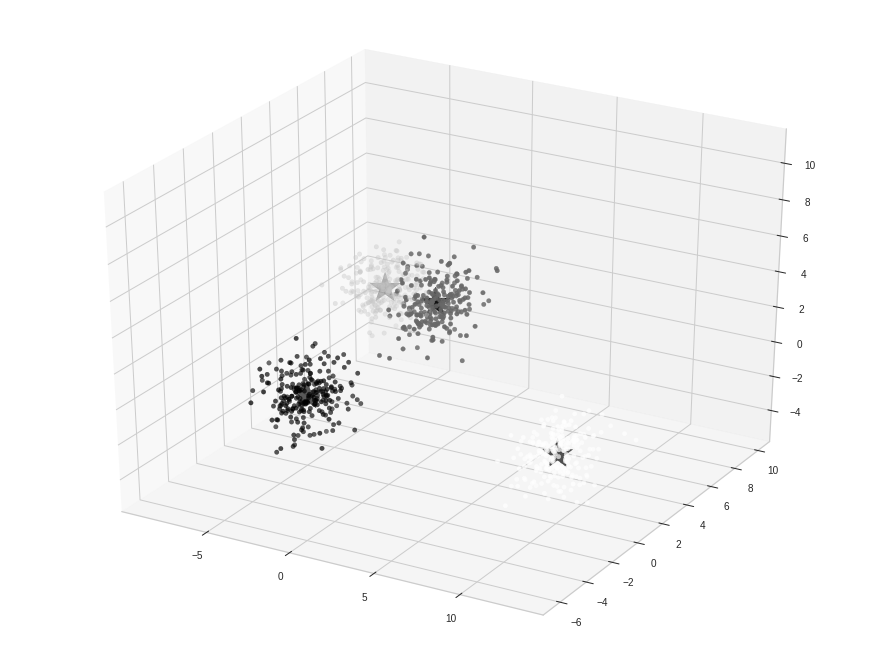

In [27]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0],x[:,1],x[:,2], c = y_hat)
ax.scatter(c[:,0],c[:,1],c[:,2], c='k', marker='*', s=1000)

KMedias también puede ayudar en el procesamiento de imágenes


In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

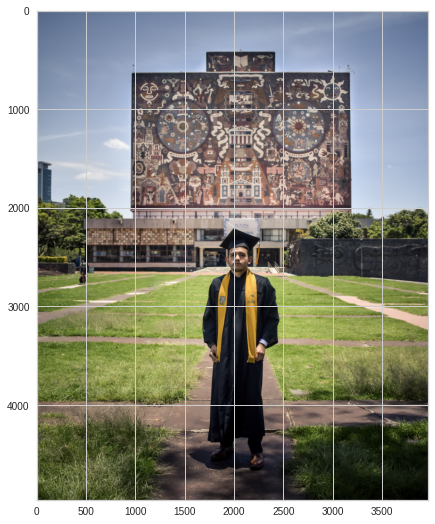

(4962, 3970, 3)

In [31]:
img_orig = cv2.imread('/DSC_0006 2.jpg')
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
img.shape

In [32]:
vect = img.reshape((-1, 3))
vect = np.float32(vect)
criteria = (cv2.TermCriteria_MAX_ITER,10,1.0)
k = 5
attempts = 10 #10 intentos de generar grupos distintos para la imágen 
ret, label, center = cv2.kmeans(vect, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)


In [34]:
center = np.uint8(center)
res = center[label.flatten()]
img_res = res.reshape((img.shape))

In [ ]:
figure.size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1), plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_res)
plt.title('Imagen segmentada con k = %i'%k, )

In [39]:
!id

uid=0(root) gid=0(root) groups=0(root)
